 # Task 1: Basic KMeans Clustering

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [5]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\DataSets\Mall_Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
# Step 3: Feature Scaling
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns=['Annual Income (k$)', 'Spending Score (1-100)'])


In [10]:
# Step 4: Apply KMeans with 2 Clusters
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
print("Cluster Labels:", y_predicted)


Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Step 5: Find Centroids
print("Centroids:\n", km.cluster_centers_)


Centroids:
 [[84.15909091 50.60227273]
 [42.01785714 49.88392857]]


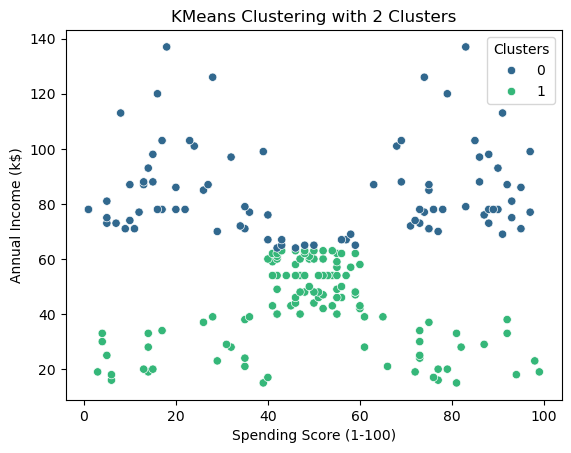

In [14]:
# Step 6: Visualize Clusters
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='Clusters', data=df, palette='viridis')
plt.title("KMeans Clustering with 2 Clusters")
plt.show()

# Task 2: Find Optimal K using Elbow Method

In [23]:
# Step 1: WCSS Calculation
import sklearn.cluster as cluster
import os
os.environ["OMP_NUM_THREADS"] = "1"



In [25]:
K = range(2, 12)
wss = []

for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)


C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

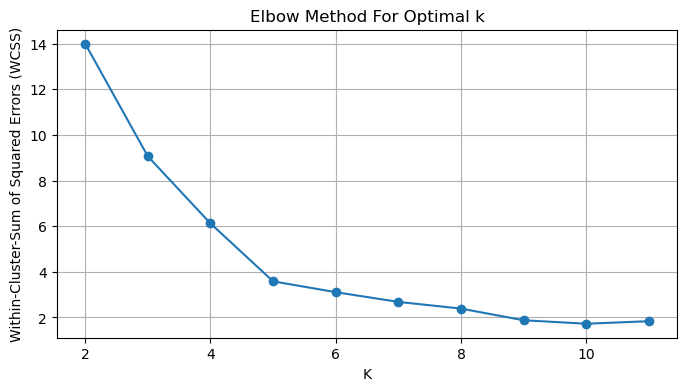

In [27]:
# Step 2: Plot WCSS vs K
plt.figure(figsize=(8, 4))
plt.plot(K, wss, marker='o')
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [29]:
# Step 3: Apply KMeans with Optimal K = 5
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Clusters'] = kmeans.labels_


C:\Users\SMART TECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


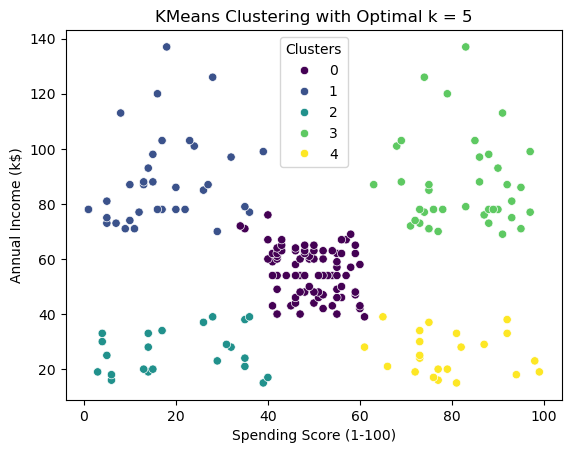

In [31]:
# Visualization
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue='Clusters', data=df, palette='viridis')
plt.title("KMeans Clustering with Optimal k = 5")
plt.show()